# [DEMO] Beyond Blanket Masking: Examining Granularity for Privacy Protection in Images Captured by Blind and Low Vision Users 

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

## LOADING MODELS 

In [2]:
from transformers import AutoProcessor
from vllm import LLM, SamplingParams
from qwen_vl_utils import process_vision_info
import torch

# Initialize the processor
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-72B-Instruct")

/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-08-15 22:04:02,521	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outp

In [3]:
# Initialize the LLM
# from vllm.config import PoolerConfig
llm = LLM(model="Qwen/Qwen2.5-VL-72B-Instruct", tensor_parallel_size=4, dtype=torch.bfloat16) # , task="generate", override_pooler_config=PoolerConfig(pooling_type="ALL"))

# llm = LLM(model="Qwen/Qwen2.5-VL-72B-Instruct", torch_dtype=torch.bfloat16,
#         attn_implementation="flash_attention_2",
#         device_map="auto",
#     )

INFO 08-15 22:04:07 __init__.py:207] Automatically detected platform cuda.
INFO 08-15 22:04:54 config.py:549] This model supports multiple tasks: {'score', 'classify', 'generate', 'reward', 'embed'}. Defaulting to 'generate'.
INFO 08-15 22:04:54 config.py:1382] Defaulting to use mp for distributed inference
WARNING 08-15 22:04:54 arg_utils.py:1197] The model has a long context length (128000). This may cause OOM errors during the initial memory profiling phase, or result in low performance due to small KV cache space. Consider setting --max-model-len to a smaller value.
INFO 08-15 22:04:54 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='Qwen/Qwen2.5-VL-72B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-VL-72B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=auto, tensor_

Loading safetensors checkpoint shards:   0% Completed | 0/38 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   3% Completed | 1/38 [00:04<02:51,  4.63s/it]
Loading safetensors checkpoint shards:   5% Completed | 2/38 [00:09<02:47,  4.66s/it]
Loading safetensors checkpoint shards:   8% Completed | 3/38 [00:13<02:42,  4.65s/it]
Loading safetensors checkpoint shards:  11% Completed | 4/38 [00:18<02:40,  4.73s/it]
Loading safetensors checkpoint shards:  13% Completed | 5/38 [00:23<02:39,  4.84s/it]
Loading safetensors checkpoint shards:  16% Completed | 6/38 [00:28<02:35,  4.87s/it]
Loading safetensors checkpoint shards:  18% Completed | 7/38 [00:34<02:38,  5.11s/it]
Loading safetensors checkpoint shards:  21% Completed | 8/38 [00:39<02:34,  5.16s/it]
Loading safetensors checkpoint shards:  24% Completed | 9/38 [00:45<02:33,  5.28s/it]
Loading safetensors checkpoint shards:  26% Completed | 10/38 [00:50<02:30,  5.36s/it]
Loading safetensors checkpoint shards:  29% Completed | 11/38

(VllmWorkerProcess pid=519723) INFO 08-15 22:08:26 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=519731) INFO 08-15 22:08:26 model_runner.py:1115] Loading model weights took 34.4339 GB
INFO 08-15 22:08:26 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=519726) INFO 08-15 22:08:26 model_runner.py:1115] Loading model weights took 34.4339 GB


(VllmWorkerProcess pid=519726) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
(VllmWorkerProcess pid=519731) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
(VllmWorkerProcess pid=519723) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


(VllmWorkerProcess pid=519726) INFO 08-15 22:10:48 worker.py:267] Memory profiling takes 141.51 seconds
(VllmWorkerProcess pid=519726) INFO 08-15 22:10:48 worker.py:267] the current vLLM instance can use total_gpu_memory (79.25GiB) x gpu_memory_utilization (0.90) = 71.33GiB
(VllmWorkerProcess pid=519726) INFO 08-15 22:10:48 worker.py:267] model weights take 34.43GiB; non_torch_memory takes 0.35GiB; PyTorch activation peak memory takes 19.09GiB; the rest of the memory reserved for KV Cache is 17.45GiB.
(VllmWorkerProcess pid=519723) INFO 08-15 22:10:48 worker.py:267] Memory profiling takes 141.59 seconds
(VllmWorkerProcess pid=519723) INFO 08-15 22:10:48 worker.py:267] the current vLLM instance can use total_gpu_memory (79.25GiB) x gpu_memory_utilization (0.90) = 71.33GiB
(VllmWorkerProcess pid=519723) INFO 08-15 22:10:48 worker.py:267] model weights take 34.43GiB; non_torch_memory takes 0.37GiB; PyTorch activation peak memory takes 19.09GiB; the rest of the memory reserved for KV Cache

Capturing CUDA graph shapes:   0%|                                                                                                                               | 0/35 [00:00<?, ?it/s]

INFO 08-15 22:10:51 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-15 22:10:51 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.


Capturing CUDA graph shapes:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 34/35 [00:23<00:00,  1.60it/s]

(VllmWorkerProcess pid=519726) INFO 08-15 22:11:15 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.19 GiB


Capturing CUDA graph shapes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.44it/s]

INFO 08-15 22:11:15 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.19 GiB
(VllmWorkerProcess pid=519723) INFO 08-15 22:11:15 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.19 GiB
(VllmWorkerProcess pid=519731) INFO 08-15 22:11:15 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.19 GiB
INFO 08-15 22:11:15 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 168.75 seconds


In [4]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor

model_7b = Qwen2_5_VLForConditionalGeneration.from_pretrained(
        "Qwen/Qwen2.5-VL-7B-Instruct",
        torch_dtype=torch.bfloat16,
        # attn_implementation="flash_attention_2",
        device_map="cuda:2",
    )
        
# default processer
processor_7b = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")
model_7b.eval()
    

Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.59s/it]


Qwen2_5_VLForConditionalGeneration(
  (visual): Qwen2_5_VisionTransformerPretrainedModel(
    (patch_embed): Qwen2_5_VisionPatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2_5_VLVisionBlock(
        (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
        (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
        (attn): Qwen2_5_VLVisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): Qwen2_5_VLMLP(
          (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
          (up_proj): Linear(in_features=1280, out_features=3420, bias=True)
          (down_proj): Linear(in_features=3420, out_features=1280, bias=True)
          (act_fn): SiLU()
        )
      )
    )
    (merger): Qwen2_5_VLPatchMerger

In [5]:
import math

def rotated_bbox_polygon(bbox_rot, angle, orig_size, rot_size):
    """
    Convert a bounding box from rotated image coordinates to the original image coordinates as a polygon.

    Parameters:
    - bbox_rot: tuple (x1, y1, x2, y2) representing the bounding box on the rotated image.
    - angle: rotation angle in degrees (same as used in Image.rotate).
    - orig_size: (width, height) of the original image.
    - rot_size: (width, height) of the rotated image.

    Returns:
    - A list of four (x, y) tuples corresponding to the transformed corners in the original image.
    """
    # Convert angle to radians
    angle_rad = math.radians(angle)

    # Original image center
    w, h = orig_size
    cx, cy = w / 2, h / 2

    # Rotated image center
    new_w, new_h = rot_size
    new_cx, new_cy = new_w / 2, new_h / 2

    # Unpack bounding box in rotated image
    x1, y1, x2, y2 = bbox_rot
    # Define the four corners of the bounding box
    corners = [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]
    transformed_corners = []

    for (x_r, y_r) in corners:
        # Shift the point so the rotated image's center is at the origin
        x_dash = x_r - new_cx
        y_dash = y_r - new_cy

        # Apply the inverse rotation (rotating back by the same angle)
        x_orig = x_dash * math.cos(angle_rad) + y_dash * math.sin(angle_rad) + cx
        y_orig = -x_dash * math.sin(angle_rad) + y_dash * math.cos(angle_rad) + cy
        transformed_corners.append((x_orig, y_orig))

    return transformed_corners

In [6]:

from agents.qwen import QWEN_VLM
from agents.orientation import ORIENTATION_AGENT
from agents.segmentation import SEGMENTATION_AGENT
from agents.ocr import OCR_AGENT, pladdleOCR
from utils import *

qwen = QWEN_VLM(llm, processor)
orientation_agent  = ORIENTATION_AGENT(model_7b, processor_7b)
segmentation_agent = SEGMENTATION_AGENT()

which: no ccache in (/cm/shared/apps/slurm/current/sbin:/cm/shared/apps/slurm/current/bin:/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/bin:/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/condabin:/cm/local/apps/environment-modules/4.5.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/cm/local/apps/environment-modules/current/bin:/gpfs/software/local/bin:/gpfs/home/jmurrugarral/bin:/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/decord)
/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


## DETECT AND SEGMENT THE PRIVATE OBJECTS

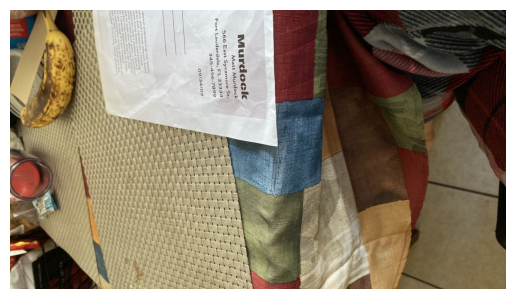

In [7]:
image_path = 'image_demo.jpg'

test_i = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(test_i)
plt.axis('off')  # Hide axes
plt.show()


In [8]:
response, pil_image = qwen.call_vlm(image_path, "Locate paper document or debit card in the image, and output in JSON format.", temperature = 1, top_p=0.8)

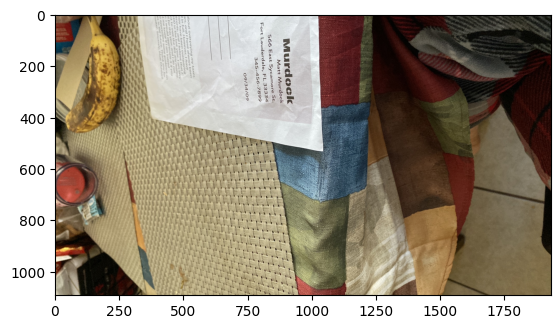

In [9]:
plt.imshow(pil_image) # SAMPLE IMAGE

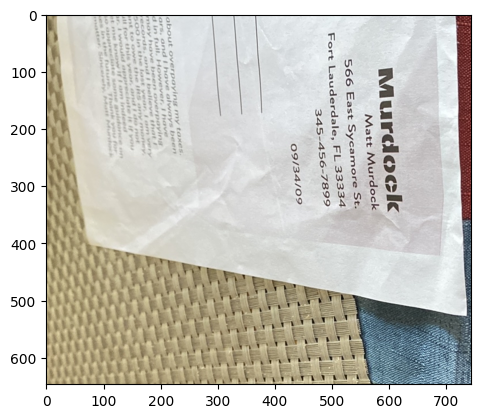

In [10]:
bbox_orig = qwen.extract_bbox(response)
cropped_image = qwen.crop_image(image_path, bbox_orig)
plt.imshow(cropped_image) # CROPPED IMAGE

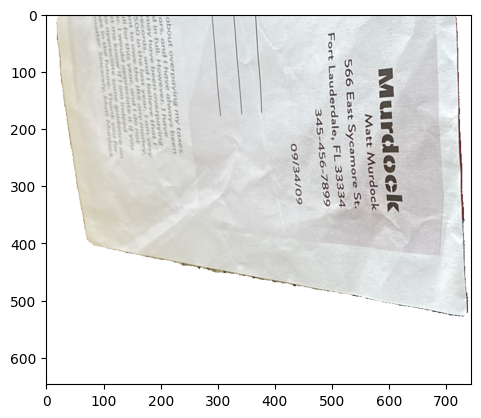

In [11]:
pred_mask = segmentation_agent.segment_document(cropped_image)
masked_image = set_zero_outside_mask(pil_to_opencv(cropped_image), pred_mask)
masked_image_copy = masked_image.copy()
masked_image_pil = opencv_to_pil(masked_image)
plt.imshow(masked_image_pil) # SEGMENTED IMAGE

## DETECT CORRECT ROTATION

*First, we use the vlm to propose a initial angle, then refine it with the OCR detections of the rotated image by (summing this new angle with the previous one)*

In [12]:
top_plausible_rotations = orientation_agent.detect_rotation(masked_image_pil, np.arange(0, 360+30, 30))
rotate_angle = top_plausible_rotations[0] #INITIAL ANGLE
print('Initial Angle:', rotate_angle)

Initial Angle: 150


In [13]:
cropped_image_tmp = masked_image_pil.copy()
rotated_image_v1 = cropped_image_tmp.rotate(rotate_angle, resample=Image.BICUBIC, expand=True, fillcolor=(255,255,255))

In [14]:
rotated_image_v1.save("rotated_image.jpg")
points, strs, elapse = pladdleOCR()
    
angles = []
for pol in points[:10]:
    angles.append(polygon_orientation(pol))
    
mean_angle  = np.mean(angles)    
print('Offset Angle:', mean_angle)
final_angle = rotate_angle + mean_angle # FINAL ANGLE
print('Final Angle:', final_angle)

Offset Angle: -64.10574438058326
Final Angle: 85.89425561941674


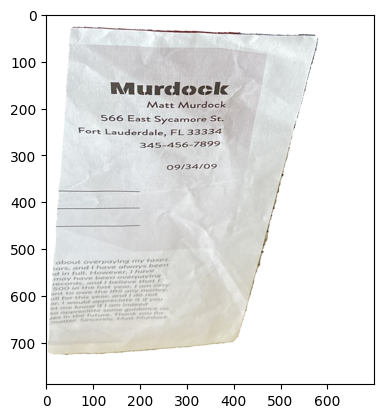

In [15]:
new_angle = mean_angle
cropped_image_tmp = masked_image_pil.copy()
rotated_image_v1 = cropped_image_tmp.rotate(final_angle, resample=Image.BICUBIC, expand=True, fillcolor=(255,255,255))
plt.imshow(rotated_image_v1)
            

## DETECT FINE GRAINED NOTATIONS AND MAPPING THEM

In [16]:
bboxes_text_info = qwen.get_finegrained_text(rotated_image_v1)
data = extract_bbox_removing_incomplete(bboxes_text_info)

In [17]:
rotated_image_v1.save("rotated_image.jpg")
points, strs, elapse = pladdleOCR()

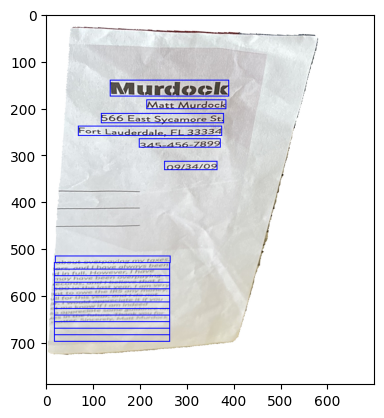

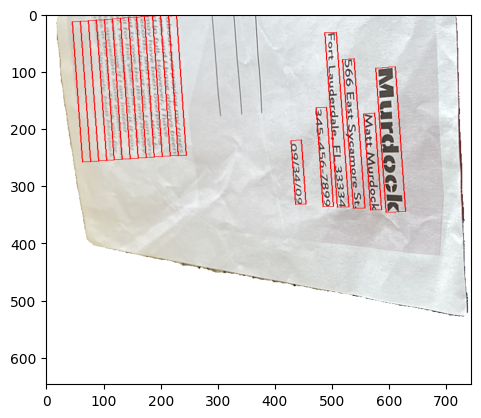

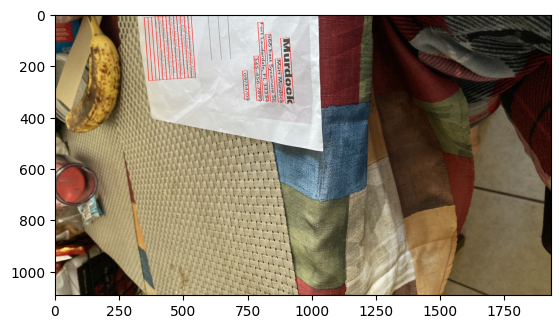

In [18]:
im  =  masked_image_pil.copy()
rot_im = rotated_image_v1.copy()

for bbox_rotated_tmp in data:
    bbox_rotated = bbox_rotated_tmp['bbox_2d']

    poly_orig = rotated_bbox_polygon(bbox_rotated, -final_angle, im.size, rot_im.size)
    
    draw_rot = ImageDraw.Draw(rot_im)
    draw_rot.rectangle(bbox_rotated, outline="blue", width=2)

    draw_orig = ImageDraw.Draw(im)
    draw_orig.polygon(poly_orig, outline="red", width=2)


plt.imshow(rot_im)
plt.show()

plt.imshow(im)
plt.show()


crop_x = bbox_orig[0]
crop_y = bbox_orig[1]
or_im  = pil_image.copy()

with open(image_path.split('/')[-1][:-4]+".txt", "w") as f:
  for bbox_rotated_tmp in data:
    bbox_rotated = bbox_rotated_tmp['bbox_2d']
    text = bbox_rotated_tmp['text_content']
    poly_orig = rotated_bbox_polygon(bbox_rotated, -final_angle, im.size, rot_im.size)

    final_poly = []
    for (x,y) in poly_orig:
      final_poly.append((crop_x+x, crop_y+y))
      f.write(f"{crop_x+x} ")
      f.write(f"{crop_y+y} ")

    f.write('\n')
      
    draw_orig = ImageDraw.Draw(or_im)
    draw_orig.polygon(final_poly, outline="red", width=2)

  

plt.imshow(or_im)
plt.show()

or_im.save(image_path.split('/')[-1])

## LABELING OUR IMAGE AND TEXTS 

In [19]:
meta_categories = ["bank statement", "letter with address", "credit or debit card", "bills or receipt", "preganancy test", "pregnancy test box",
"mortage or investment report", "doctor prescription", "empty pill bottle", "condom with plastic bag", "tattoo sleeve", "transcript",
"business card", "condom box", "local newspaper", "medical record document", "email", "phone", "id card",]

In [20]:
#qwen.sampling_params = SamplingParams(temperature=0.1, top_p=0.001, repetition_penalty=1.05, max_tokens=20, stop_token_ids=[], logprobs=20,)    
meta_category, _ = qwen.call_vlm(pil_image, f"From this list of categories: {' ,'.join(meta_categories)}, which one is related to this image> Only output the category")

In [21]:
print(meta_category) # Proposed Category for Document

business card


In [22]:
texts = [d['text_content']for d in data]

In [23]:
print(texts)

['Murdock', 'Matt Murdock', '566 East Sycamore St.', 'Fort Lauderdale, FL 33334', '345-456-7899', '09/34/09', 'about overpaying my taxes.', 'tars, and I have always been', 'id in full. However, I have', 'm been informed of overpaying', 'records, and I believe that', '500 in the last year, I am very', 'ple to have overpaid any money,', 'all for this year, and I do not', 'ar. I would appreciate it if you', 'et me know asap today.', 'so appreciate some guidance on', 'xes in the future. Thank you for', 'matter. Sincerely, Matt Murdock']


In [24]:
proposed_labels_1 = qwen.guided_labeling(rotated_image_v1, texts)

In [25]:
print(proposed_labels_1)

```json
[
    {"word": "Murdock", "entity": "personal name"},
    {"word": "Matt", "entity": "personal name"},
    {"word": "Murdock", "entity": "personal name"},
    {"word": "566", "entity": "address"},
    {"word": "East", "entity": "address"},
    {"word": "Sycamore", "entity": "address"},
    {"word": "St.", "entity": "address"},
    {"word": "Fort", "entity": "address"},
    {"word": "Lauderdale,", "entity": "address"},
    {"word": "FL", "entity": "address"},
    {"word": "33334", "entity": "address"},
    {"word": "345-456-7899", "entity": "phone number"},
    {"word": "09/34/09", "entity": "unsure"},
    {"word": "about", "entity": "unsure"},
    {"word": "overpaying", "entity": "unsure"},
    {"word": "my", "entity": "unsure"},
    {"word": "taxes.", "entity": "unsure"},
    {"word": "tars,", "entity": "unsure"},
    {"word": "and", "entity": "unsure"},
    {"word": "I", "entity": "unsure"},
    {"word": "have", "entity": "unsure"},
    {"word": "always", "entity": "unsure"},

In [26]:
for text in texts:
    proposed_labels_2 = qwen.guided_labeling_per_match(rotated_image_v1, text)
    print(proposed_labels_2)

personal name
personal name
address
address
phone number
unsure
financial statement
unsure
unsure
billing statement
financial statement
financial statement
financial statement
financial statement
unsure
unsure
unsure
unsure
personal name


In [27]:
high_risk = []
for text in texts:
    proposed_labels_3 = qwen.guided_labeling_per_match_per_metacategory(rotated_image_v1, text, meta_category)
    high_risk.append(proposed_labels_3)
    print(proposed_labels_3)

name
name
address
address
other
other
other
other
other
other
other
other
other
other
other
other
other
other
other


## USEFUL DESCRIPTIONS

In [28]:
short_description, _ = qwen.call_vlm(pil_image, f"describe this image with three short sentences, include the private content in detail")
long_description, _ = qwen.call_vlm(pil_image, f"describe this image, including the private content in detail")

In [29]:
print(short_description)

The image shows a table with a woven placemat and various items, including a ripe banana and a red cup. A piece of paper with the name "Matt Murdock" and an address at "566 East Sycamore St., Fort Lauderdale, FL 33334" is prominently displayed on the table. The table is partially covered by a colorful patchwork cloth featuring shades of red, blue, green, and beige.


In [30]:
print(long_description)

The image shows a close-up of a table with various items on it. Here is a detailed description:

1. **Table Surface**: The table has a woven texture, likely made of a synthetic material, and is light beige in color.

2. **Items on the Table**:
   - **Banana**: On the left side of the image, there is a ripe banana with some brown spots.
   - **Paper Document**: There is a piece of paper with text on it. The visible part of the text includes an address: "566 East Sycamore St., Fort Lauderdale, FL 33334" and a phone number: "345-456-7899". The date "09/34/09" is also visible. The name "Matt Murdock" appears at the top right corner of the document.
   - **Fabric**: To the right of the document, there is a colorful fabric with a patchwork design. The colors include red, green, blue, yellow, and white. The fabric appears to be folded or draped over something.
   - **Other Items**: There are some other items partially visible on the left side of the image, including what looks like a red cont

## HIGH RISK SEGMENTATION

*This depend of your approach. To illustrate I will only segments detection labeled as name or address.*

In [31]:
print(high_risk)

['name', 'name', 'address', 'address', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


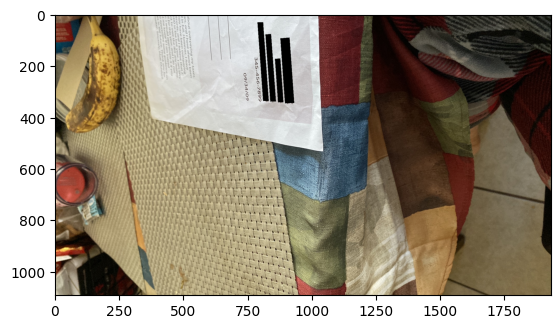

In [32]:
crop_x = bbox_orig[0]
crop_y = bbox_orig[1]
hr_im  = pil_image.copy()

for id_p, bbox_rotated_tmp in enumerate(data):
  bbox_rotated = bbox_rotated_tmp['bbox_2d']
  text = bbox_rotated_tmp['text_content']
  poly_orig = rotated_bbox_polygon(bbox_rotated, -final_angle, im.size, rot_im.size)

  final_poly = []
  for (x,y) in poly_orig:
    final_poly.append((crop_x+x, crop_y+y))

  if high_risk[id_p] == 'name' or high_risk[id_p] == 'address':
      draw_orig = ImageDraw.Draw(hr_im)
      draw_orig.polygon(final_poly, fill="black")

plt.imshow(hr_im)
plt.show()